**ASSIGNMENT 3 BY CHETANVARMA CHAMARTHI 21BCE7252**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Exploratory Data Analysis**

In [3]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<ipython-input-4-6b73006e35ff>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df_train['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

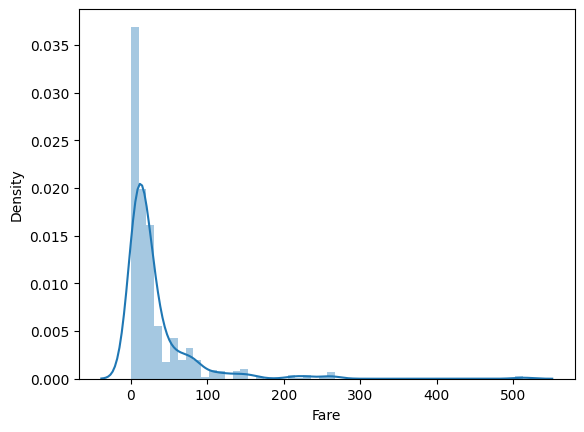

In [4]:
sn.distplot(df_train['Fare'])

In [9]:
class_fare=df_train.pivot_table(index='Pclass',values='Fare')
class_fare

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


Text(0, 0.5, 'Avg fare')

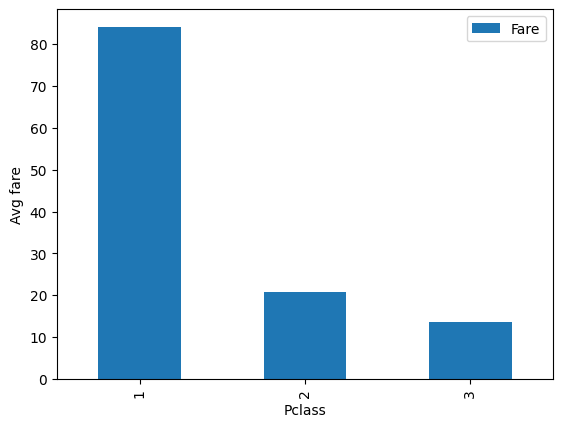

In [10]:
class_fare.plot(kind='bar')
plt.ylabel('Avg fare')

**Data Preprocessing**

In [12]:
train_len=len(df_train)
df=pd.concat([df_train,df_test],axis=0)
df=df.reset_index(drop=True)
df2=df.drop(['Cabin','Name','Ticket'],axis=1)
df2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,S
1,2,1.0,1,female,38.0,1,0,71.2833,C
2,3,1.0,3,female,26.0,0,0,7.9250,S
3,4,1.0,1,female,35.0,1,0,53.1000,S
4,5,0.0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,male,NaN,0,0,8.0500,S
1305,1306,NaN,1,female,39.0,0,0,108.9000,C
1306,1307,NaN,3,male,38.5,0,0,7.2500,S
1307,1308,NaN,3,male,NaN,0,0,8.0500,S


In [13]:
df2.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Fare             1
Embarked         2
dtype: int64

In [14]:
df3=df2
df3['Age']=df3['Age'].fillna(df3['Age'].mean())
df3.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             1
Embarked         2
dtype: int64

In [15]:
df3['Fare']=df3['Fare'].fillna(df3['Fare'].mean())
df3.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [16]:
df3.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,S
1,2,1.0,1,female,38.0,1,0,71.2833,C
2,3,1.0,3,female,26.0,0,0,7.9250,S
3,4,1.0,1,female,35.0,1,0,53.1000,S
4,5,0.0,3,male,35.0,0,0,8.0500,S


In [17]:
df3['Embarked']=df3['Embarked'].fillna(df3['Embarked'].mode()[0])
df3.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,S
1,2,1.0,1,female,38.0,1,0,71.2833,C
2,3,1.0,3,female,26.0,0,0,7.9250,S
3,4,1.0,1,female,35.0,1,0,53.1000,S
4,5,0.0,3,male,35.0,0,0,8.0500,S


**Log Transformation of Fare for more uniform distribution**

In [18]:
df3['Fare']=np.log(df3['Fare']+1)

<ipython-input-19-6d5660da6323>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df3['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

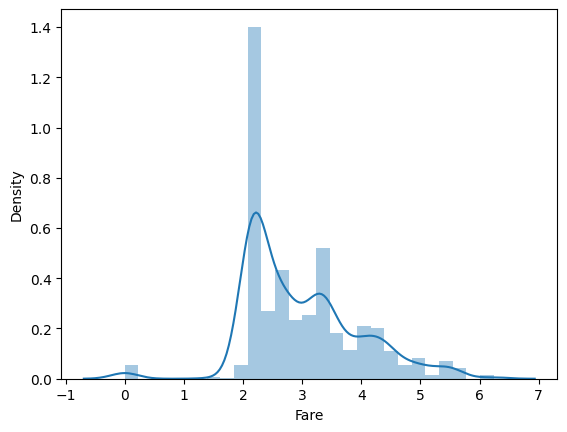

In [19]:
sn.distplot(df3['Fare'])

<ipython-input-20-d079efc0401b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df3.corr()


<Axes: >

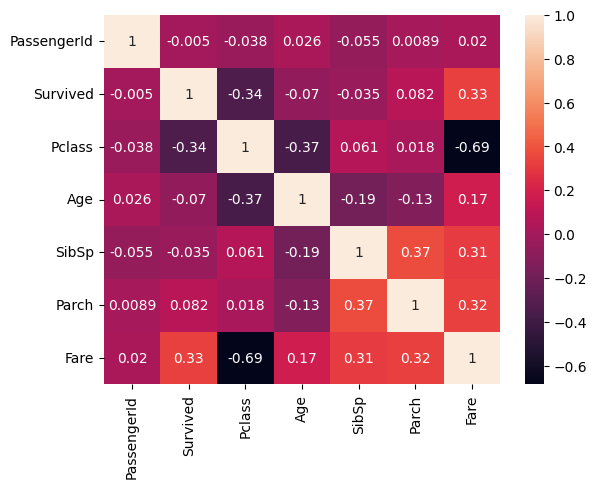

In [20]:
corr=df3.corr()
sn.heatmap(corr, annot=True)

In [21]:
df4=df3.drop(['PassengerId'],axis=1)
df4.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,2.110213,S
1,1.0,1,female,38.0,1,0,4.280593,C
2,1.0,3,female,26.0,0,0,2.188856,S
3,1.0,1,female,35.0,1,0,3.990834,S
4,0.0,3,male,35.0,0,0,2.202765,S


**Label Encoding**

In [22]:
from sklearn.preprocessing import LabelEncoder
cols=['Sex','Embarked']
le=LabelEncoder()
for col in cols:
    df4[col]=le.fit_transform(df4[col])
df4.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.0,1,0,2.110213,2
1,1.0,1,0,38.0,1,0,4.280593,0
2,1.0,3,0,26.0,0,0,2.188856,2
3,1.0,1,0,35.0,1,0,3.990834,2
4,0.0,3,1,35.0,0,0,2.202765,2


**Train and Test**

In [23]:
train=df4.iloc[:train_len,:]
test=df4.iloc[train_len:,:]

In [24]:
x=train.drop(['Survived'],axis=1)
y=train['Survived']

**Model Training**

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
def classify(model):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
    model.fit(x_train,y_train)
    print('accuracy',model.score(x_test,y_test))
    score=cross_val_score(model,x,y,cv=5)
    print('CV score',np.mean(score))

In [26]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model)

accuracy 0.8071748878923767
CV score 0.7833971502102819


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model)

accuracy 0.7399103139013453
CV score 0.773316176009039


In [28]:
!pip install lightgbm
from lightgbm import LGBMClassifier
model=LGBMClassifier(verbose=0)
classify(model)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

**Full Data Training**

In [29]:
model=LGBMClassifier()
model.fit(x,y)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 222
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [30]:
x_test=test.drop(['Survived'],axis=1)

In [31]:
pred=model.predict(x_test)
pred

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

**Results**

In [32]:
fdata=pd.read_csv('gender_submission.csv')
fdata

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


**Replace Values of the Survived Column with predicted values**

In [33]:
fdata['Survived']=pred
fdata['Survived']=fdata['Survived'].astype('int')
fdata

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
